In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [46]:
PATH = './healthcare-dataset-stroke-data.csv'
DATASET_SIZE = 10000
COLUMN_NAME_X='Age'
COLUMN_NAME_Y='Heart Disease'

In [47]:
dataset = pd.read_csv(PATH, index_col=None, encoding="latin-1")
dataset = dataset.head(DATASET_SIZE)
dataset

,Patient ID,Patient Name,Age,Gender,Hypertension,Heart Disease,Marital Status,Work Type,Residence Type,Average Glucose Level,...,Alcohol Intake,Physical Activity,Stroke History,Family History of Stroke,Dietary Habits,Stress Levels,Blood Pressure Levels,Cholesterol Levels,Symptoms,Diagnosis
0,18153,Mamooty Khurana,56,Male,0,1,Married,Self-employed,Rural,130.91,...,Social Drinker,Moderate,0,Yes,Vegan,3.48,140/108,"HDL: 68, LDL: 133","Difficulty Speaking, Headache",Stroke
1,62749,Kaira Subramaniam,80,Male,0,0,Single,Self-employed,Urban,183.73,...,Never,Low,0,No,Paleo,1.73,146/91,"HDL: 63, LDL: 70","Loss of Balance, Headache, Dizziness, Confusion",Stroke
2,32145,Dhanush Balan,26,Male,1,1,Married,Never Worked,Rural,189.00,...,Rarely,High,0,Yes,Paleo,7.31,154/97,"HDL: 59, LDL: 95","Seizures, Dizziness",Stroke
3,6154,Ivana Baral,73,Male,0,0,Married,Never Worked,Urban,185.29,...,Frequent Drinker,Moderate,0,No,Paleo,5.35,174/81,"HDL: 70, LDL: 137","Seizures, Blurred Vision, Severe Fatigue, Head...",No Stroke
4,48973,Darshit Jayaraman,51,Male,1,1,Divorced,Self-employed,Urban,177.34,...,Rarely,Low,0,Yes,Pescatarian,6.84,121/95,"HDL: 65, LDL: 68",Difficulty Speaking,Stroke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,98295,Ivan Behl,33,Female,0,1,Single,Never Worked,Rural,104.33,...,Never,Moderate,0,No,Paleo,0.46,180/67,"HDL: 31, LDL: 74","Difficulty Speaking, Loss of Balance, Difficul...",No Stroke
9996,67195,Keya Mani,65,Male,0,0,Single,Government Job,Rural,97.29,...,Social Drinker,High,1,No,Non-Vegetarian,3.26,117/77,"HDL: 47, LDL: 80",Dizziness,Stroke
9997,72437,Kartik Garde,19,Female,0,1,Divorced,Never Worked,Rural,108.93,...,Rarely,Moderate,1,No,Gluten-Free,7.81,138/103,"HDL: 48, LDL: 93",NaN,Stroke
9998,13321,Indrans Shah,86,Female,0,0,Divorced,Self-employed,Urban,177.74,...,Social Drinker,Moderate,0,Yes,Vegan,0.96,156/63,"HDL: 50, LDL: 125","Weakness, Severe Fatigue, Loss of Balance, Wea...",No Stroke


In [48]:
sns.set_style('darkgrid')
sns.set_palette('Set1')

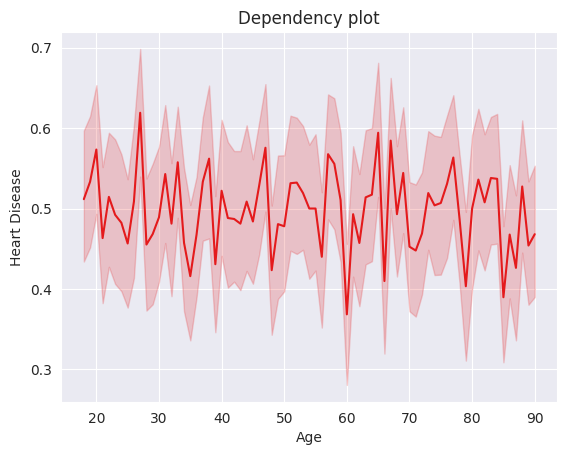

In [49]:
sns.lineplot(
    x=dataset[COLUMN_NAME_X],
    y=dataset[COLUMN_NAME_Y]
)

plt.title('Dependency plot')
plt.xlabel(COLUMN_NAME_X)
plt.ylabel(COLUMN_NAME_Y)

plt.show()

In [50]:
x = np.array(dataset[COLUMN_NAME_X]).reshape(-1, 1)
y = np.array(dataset[COLUMN_NAME_Y]).reshape(-1, 1)

In [ ]:
DEGREE = 2

regression = make_pipeline(PolynomialFeatures(DEGREE), LinearRegression())
regression.fit(x, y)

In [52]:
predictions = regression.predict(x)
mean_squared_error = np.mean((predictions - np.array(y)) ** 2)
print(f'MSE = {mean_squared_error}')

MSE = 0.24996570041704477


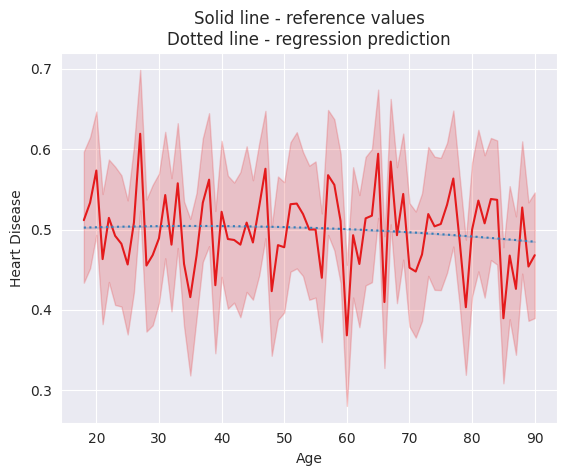

In [53]:
sns.lineplot(
    x=dataset[COLUMN_NAME_X],
    y=dataset[COLUMN_NAME_Y],
    linestyle="solid"
)
sns.lineplot(
    x=dataset[COLUMN_NAME_X],
    y=predictions.reshape(-1),
    linestyle="dotted"
)
plt.title(
    "Solid line - reference values\n"
    "Dotted line - regression prediction"
)
plt.xlabel(COLUMN_NAME_X)
plt.ylabel(COLUMN_NAME_Y)
plt.show()

In [54]:
x_parameters = np.append(
    regression['linearregression'].intercept_[0],
    regression['linearregression'].coef_[0][1:]
)

print(f'y = {x_parameters[0]} + {x_parameters[1]}x + {x_parameters[2]}x^2')

y = 0.49610361238682815 + 0.0004691887562670989x + -6.602254140266966e-06x^2
